In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy 

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | yanan
City not found. Skipping...
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | kombotion
City not found. Skipping...
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | ca mau
Processing Record 19 of Set 1 | ossora
Processing Record 20 of Set 1 | vao
Processing Record 21 of Set 1 | guerrero

Processing Record 34 of Set 4 | salvador
Processing Record 35 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 36 of Set 4 | xai-xai
Processing Record 37 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | victor harbor
Processing Record 40 of Set 4 | valea salciei
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | sairang
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | sokoni
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | fort nelson
Processing Record 48 of Set 4 | hermanus
Processing Record 49 of Set 4 | cidreira
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | chumikan
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | san francisco
Processing Record 4 of Set 5 | cuamba
Processing Record 5 of Set 5 | flin flon
Processing Record 6 of Se

Processing Record 24 of Set 8 | san andres
Processing Record 25 of Set 8 | erzin
Processing Record 26 of Set 8 | houston
Processing Record 27 of Set 8 | jacmel
Processing Record 28 of Set 8 | san cristobal
Processing Record 29 of Set 8 | saleaula
City not found. Skipping...
Processing Record 30 of Set 8 | toba
Processing Record 31 of Set 8 | ferkessedougou
Processing Record 32 of Set 8 | mirabad
Processing Record 33 of Set 8 | alvorada
Processing Record 34 of Set 8 | simav
Processing Record 35 of Set 8 | baoqing
Processing Record 36 of Set 8 | belmonte
Processing Record 37 of Set 8 | acapulco
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 | kaoma
Processing Record 40 of Set 8 | champerico
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | adrar
Processing Record 43 of Set 8 | mishkino
Processing Record 44 of Set 8 | xianyang
Processing Record 45 of Set 8 | northam
Processing Record 46 of Set 8 | fairbanks
Processing Record 47 of Set 8 | linco

Processing Record 12 of Set 12 | puerto cabello
Processing Record 13 of Set 12 | kiama
Processing Record 14 of Set 12 | howard springs
Processing Record 15 of Set 12 | kiunga
Processing Record 16 of Set 12 | kaina
Processing Record 17 of Set 12 | baykit
Processing Record 18 of Set 12 | kerman
Processing Record 19 of Set 12 | nago
Processing Record 20 of Set 12 | jaguaquara
Processing Record 21 of Set 12 | okha
Processing Record 22 of Set 12 | labutta
City not found. Skipping...
Processing Record 23 of Set 12 | gandajika
Processing Record 24 of Set 12 | pangnirtung
Processing Record 25 of Set 12 | grants pass
Processing Record 26 of Set 12 | huai thalaeng
Processing Record 27 of Set 12 | rio grande
Processing Record 28 of Set 12 | imperatriz
Processing Record 29 of Set 12 | acari
Processing Record 30 of Set 12 | trinidad
Processing Record 31 of Set 12 | namatanai
Processing Record 32 of Set 12 | lyubinskiy
Processing Record 33 of Set 12 | port-cartier
Processing Record 34 of Set 12 | ur

In [70]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.86,87,75,27.63,AR,2021-10-21 23:35:28
1,Puerto Ayora,-0.7393,-90.3518,69.78,83,59,8.37,EC,2021-10-21 23:35:29
2,East London,-33.0153,27.9116,68.23,87,100,1.41,ZA,2021-10-21 23:32:34
3,Vila Velha,-20.3297,-40.2925,69.75,73,0,8.05,BR,2021-10-21 23:35:31
4,Olafsvik,64.8945,-23.7142,40.28,65,67,14.50,IS,2021-10-21 23:35:31
5,Ponta Do Sol,32.6667,-17.1000,70.43,63,15,5.86,PT,2021-10-21 23:35:32
6,Atuona,-9.8000,-139.0333,77.83,78,10,17.34,PF,2021-10-21 23:35:33
7,Husavik,66.0449,-17.3389,28.31,72,100,3.56,IS,2021-10-21 23:35:34
8,Port Lincoln,-34.7333,135.8667,64.18,64,58,4.56,AU,2021-10-21 23:35:35
9,Thompson,55.7435,-97.8558,32.16,86,75,8.05,CA,2021-10-21 23:32:15


In [71]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-21 23:35:28,-54.8000,-68.3000,38.86,87,75,27.63
1,Puerto Ayora,EC,2021-10-21 23:35:29,-0.7393,-90.3518,69.78,83,59,8.37
2,East London,ZA,2021-10-21 23:32:34,-33.0153,27.9116,68.23,87,100,1.41
3,Vila Velha,BR,2021-10-21 23:35:31,-20.3297,-40.2925,69.75,73,0,8.05
4,Olafsvik,IS,2021-10-21 23:35:31,64.8945,-23.7142,40.28,65,67,14.50
...,...,...,...,...,...,...,...,...,...
552,Alugan,PH,2021-10-21 23:45:18,12.2188,125.4808,81.48,85,76,10.96
553,Los Llanos De Aridane,ES,2021-10-21 23:45:19,28.6585,-17.9182,73.13,44,90,5.99
554,Whitehorse,CA,2021-10-21 23:42:48,60.7161,-135.0538,45.01,56,75,11.01
555,Linxia,CN,2021-10-21 23:45:22,35.6003,103.2064,41.90,78,83,2.62


In [72]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [73]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

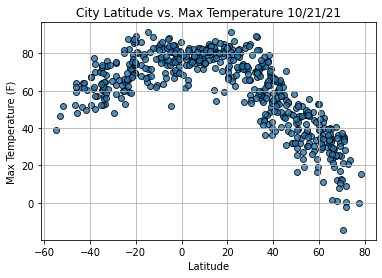

In [74]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

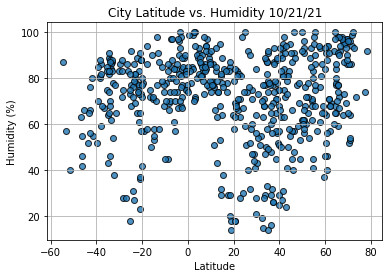

In [75]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

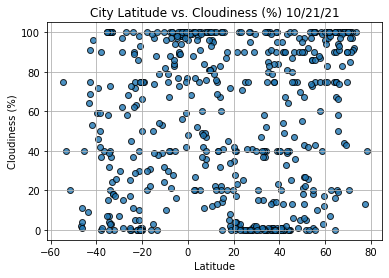

In [76]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

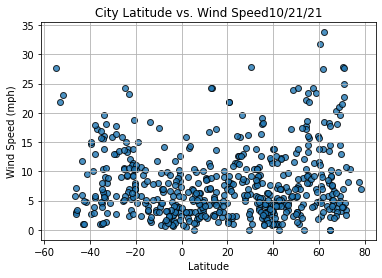

In [77]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [136]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [137]:
index13= city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-10-21 23:35:40
Lat                        -33.65
Lng                      115.3333
Max Temp                    53.04
Humidity                       62
Cloudiness                     37
Wind Speed                   5.53
Name: 13, dtype: object

In [138]:
city_data_df["Lat"]>=0

0      False
1      False
2      False
3      False
4       True
       ...  
552     True
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [139]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Olafsvik,IS,2021-10-21 23:35:31,64.8945,-23.7142,40.28,65,67,14.50
5,Ponta Do Sol,PT,2021-10-21 23:35:32,32.6667,-17.1000,70.43,63,15,5.86
7,Husavik,IS,2021-10-21 23:35:34,66.0449,-17.3389,28.31,72,100,3.56
9,Thompson,CA,2021-10-21 23:32:15,55.7435,-97.8558,32.16,86,75,8.05
10,Katsuura,JP,2021-10-21 23:35:38,35.1333,140.3000,55.18,91,100,19.06


In [140]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

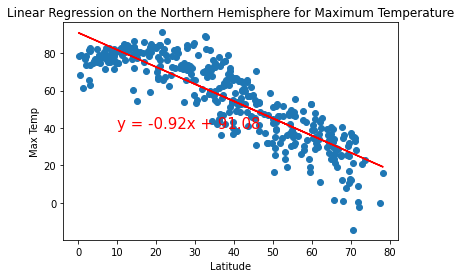

In [141]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))


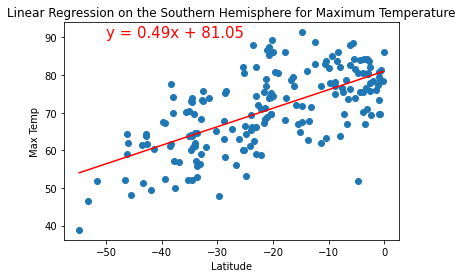

In [142]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

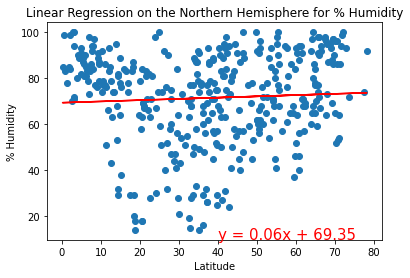

In [145]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

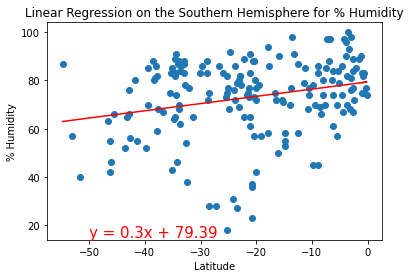

In [146]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

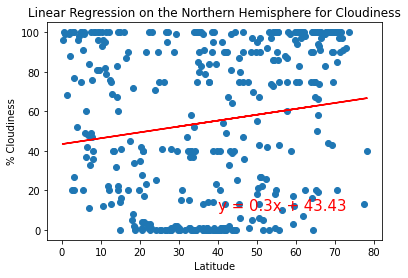

In [148]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness',(40,10))


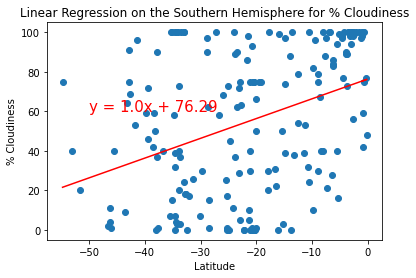

In [150]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

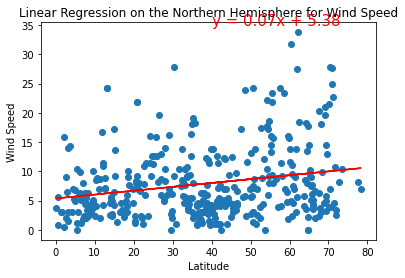

In [152]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

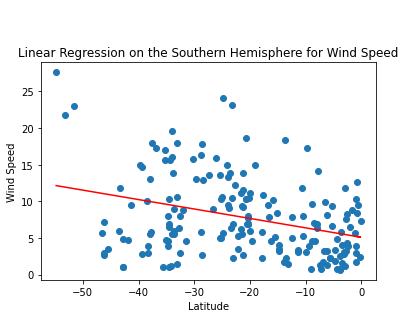

In [154]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))